<a href="https://colab.research.google.com/github/kelleyl54/DSPS_LKelley/blob/master/HW12_lKelley/DSPS2019_HW12_1_lKelley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(123)

# 1 Getting the data: standard handwritten digit recognition task

In [4]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 2 understand the input data

# task 1: print the shape of the train input and train labels

# task 2: print the label of the 10th observation

# task 3: what is the shape of train_input 1?

# task 4: plot train_inpu 1


In [5]:
#task1
print("The train input shape is", train_input.shape, '\n',
      "and the labels shape is", train_labels.shape)

The train input shape is (60000, 28, 28) 
 and the labels shape is (60000,)


In [6]:
#task 2
print("the label of the 10th observation is", train_labels[9])

the label of the 10th observation is 4


In [7]:
#task 3
print("train_input[1].shape: ", train_input[1].shape)

train_input[1].shape:  (28, 28)


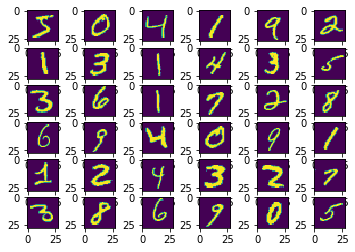

In [8]:
#task 4
imax = 6
for i in range(imax):
    for j in range(imax):
        pl.subplot(imax,imax,i*imax+j+1)
        pl.imshow(train_input[i*imax+j])

# 3 Create the model

# task 5: create a model with 3 layers: input layer and 2 fully connected layers with 128 and 10 neurons respectively

In [9]:
#task 5
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# 4 set the hyperparameters
# task 6: set a learning rate of 0.01, a loss function "sparse_categorical_crossentropy" and set the metric to "accuracy
                                              

In [0]:
model.compile?

In [0]:
#task 6
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6553 - acc: 0.8364
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3651 - acc: 0.9008
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3139 - acc: 0.9158
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2860 - acc: 0.9208
Epoch 5/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2624 - acc: 0.9267


# Task 7: test the model

In [12]:
test_loss, test_acc = model.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.2548 - acc: 0.9323


# task 8 plot the 10'th test observation and its label and prediction

In [13]:
pred = model.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 27us/sample


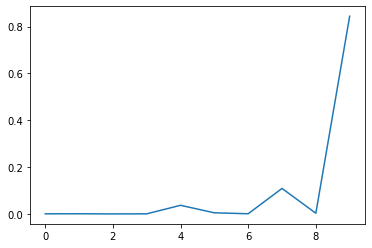

In [14]:
pl.plot(pred[9])

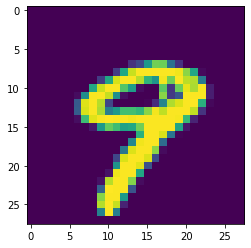

In [18]:
pl.imshow(test_input[9])

# task 9: find the first wrong prediction in the test set

In [15]:
for i, pre in enumerate(pred):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

8


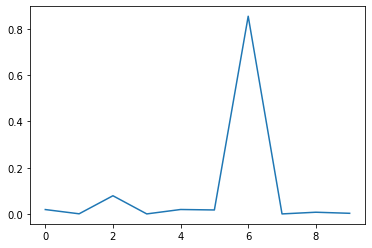

In [16]:
pl.plot(pred[firstfail])

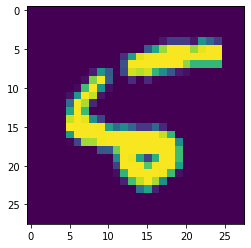

In [17]:
pl.imshow(test_input[firstfail])

In [19]:
test_labels[firstfail]

5

The above image is supposed to be a 5. It's easy to see how it may have failed to categorized this handwritten numeral correctly.

# Task 10:

In [0]:
model10 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

In [21]:
model10.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model10.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 2.2982 - acc: 0.1213
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 2.2723 - acc: 0.1804
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 2.1840 - acc: 0.3281
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 1.7516 - acc: 0.4610
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 1.2545 - acc: 0.6067


In [22]:
test_loss10, test_acc10 = model10.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 36us/sample - loss: 1.0796 - acc: 0.7023


In [23]:
pred10 = model10.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 28us/sample


In [24]:
for i, pre in enumerate(pred10):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

6


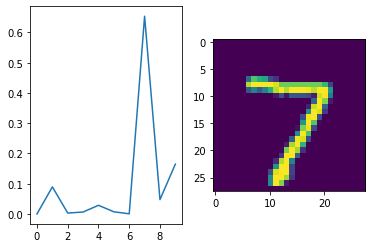

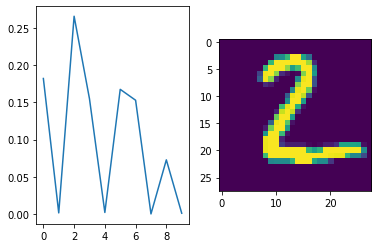

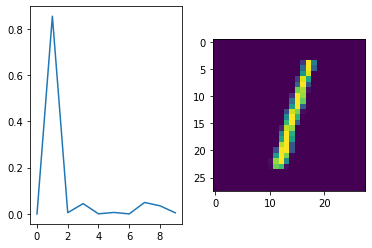

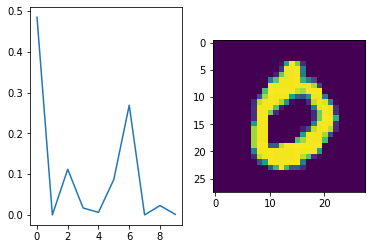

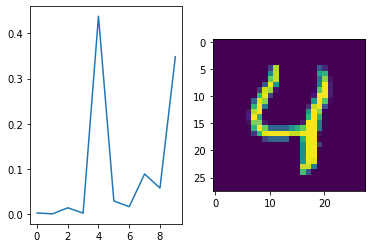

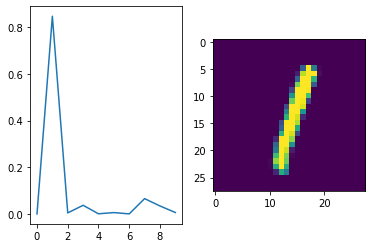

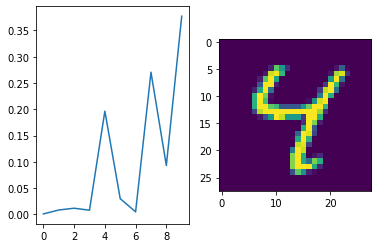

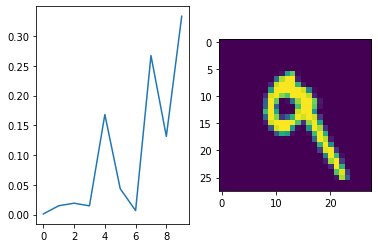

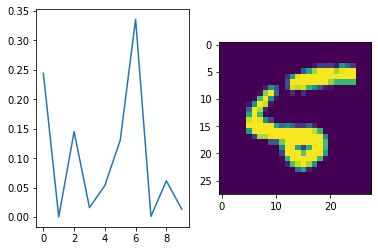

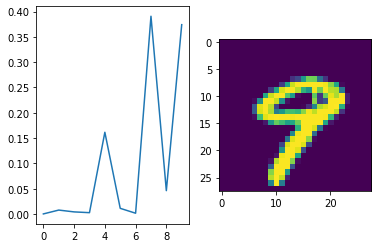

In [25]:
for i in range(10):
    pl.subplot(121)
    pl.plot(pred10[i])
    pl.subplot(122)
    pl.imshow(test_input[i])
    pl.show()

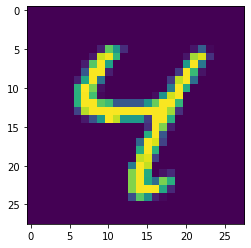

In [26]:

pl.imshow(test_input[firstfail])

This model is likely overfitting, as this image is pretty clearly representing the number 4. We have added too many layers/neurons to our net for it to be effective. 